In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
import seaborn as sns

#### QUESTION 1 [29 points]

[Wish](wish.com) in an online retailer offering hundreds of thousands of products at steep discounts. Founded in 2011, Wish was originally designed as ‘Pinterest for products’ where users could curate a ‘wish list’ of items available for sale on other websites. Since pivoting to an e-commerce business model, Wish has expanded to over 160 countries and become the primary online shopping destination for budget-conscious consumers. 

The data science team at Wish is currently experimenting with a pop-up feature to learn how various discount offerings impact client's shopping behaviour with the goal of converting more browsers (users who view the site but don’t purchase) to purchasers. In particular, the team is interested in understanding how the browser-to-purchaser (BTP) conversion rate  depends on discount amount and discount duration. They would also like to determine which combination of discount amount and duration results in the highest BTP conversion rate. 

To investigate this, the team designs an experiment in which users browsing the website are shown a targeted pop-up above the product they are interested in, offering a time-sensitive discount. The pop-ups are configured in accordance with a factorial design in which the $m=9$ different combinations of discount amount (5%, 10%, or 15%) and discount duration (15, 30, or 60 minutes) are considered. The team randomly assigns $n=500$ users to each discount condition. For each of these users, whether they make a purchase is recorded. The data are available in the file `wish.csv`.


(a)	[2 points] What is the metric of interest and what is the corresponding response variable?

        MOI: browser-to-purchaser (BTP) conversion rate

        response variable: whether a user makes a purchase after being shown the pop-up with a specific discount amount and duration

(b)	[4 points] What are the design factors and what are their levels?
        
        Factors: Discount Amount, Discount Duration 

        Levels: Discount Amount={5%, 10%, or 15%}, Discount Duration={15, 30, or 60 minutes}

(c)	[1 point] What are the experimental units?

        users who are browsing the Wish website and are exposed to the pop-up feature

(d)	[2 points] Construct and interpret the interaction effects plot for the factors identified in (b). Comment on which condition appears to be optimal.


In [10]:
df = pd.read_csv('./data/wish.csv')
df['Purchase'] = df['Purchase'].replace({'Yes': 1, 'No': 0})
df

,Purchase,Amount,Duration
0,0,5%,15
1,0,5%,15
2,0,5%,15
3,0,5%,15
4,0,5%,15
...,...,...,...
4495,0,15%,60
4496,1,15%,60
4497,0,15%,60
4498,1,15%,60


In [43]:
df.groupby(['Amount']).get_group('5%')

,Purchase,Amount,Duration
0,0,5%,15
1,0,5%,15
2,0,5%,15
3,0,5%,15
4,0,5%,15
...,...,...,...
1495,0,5%,60
1496,0,5%,60
1497,0,5%,60
1498,1,5%,60


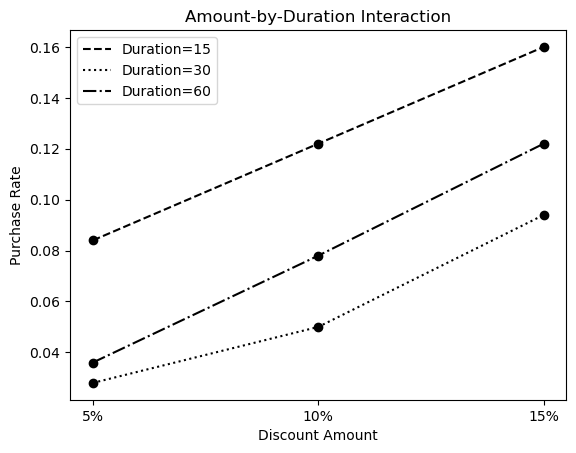

In [57]:
y_a5_d15 = df.groupby(['Amount', 'Duration']).mean().loc[('5%', 15)]['Purchase']
y_a5_d30 = df.groupby(['Amount', 'Duration']).mean().loc[('5%', 30)]['Purchase']
y_a5_d60 = df.groupby(['Amount', 'Duration']).mean().loc[('5%', 60)]['Purchase']
y_a10_d15 = df.groupby(['Amount', 'Duration']).mean().loc[('10%', 15)]['Purchase']
y_a10_d30 = df.groupby(['Amount', 'Duration']).mean().loc[('10%', 30)]['Purchase']
y_a10_d60 = df.groupby(['Amount', 'Duration']).mean().loc[('10%', 60)]['Purchase']
y_a15_d15 = df.groupby(['Amount', 'Duration']).mean().loc[('15%', 15)]['Purchase']
y_a15_d30 = df.groupby(['Amount', 'Duration']).mean().loc[('15%', 30)]['Purchase']
y_a15_d60 = df.groupby(['Amount', 'Duration']).mean().loc[('15%', 60)]['Purchase']

plt.figure()
plt.scatter(x = [1,1,1,2,2,2,3,3,3], y = [y_a5_d15,y_a5_d30,y_a5_d60,y_a10_d15,y_a10_d30,y_a10_d60,y_a15_d15,y_a15_d30,y_a15_d60], c = "black")
plt.ylabel("Purchase Rate")
plt.xlabel("Discount Amount")
plt.title("Amount-by-Duration Interaction")
plt.xticks(ticks = [1,2,3], labels = ['5%', "10%", "15%"])
d15, = plt.plot([1,2,3], [y_a5_d15,y_a10_d15,y_a15_d15], c = "black", linestyle = "dashed", label = "Duration=15")
d30, = plt.plot([1,2,3], [y_a5_d30,y_a10_d30,y_a15_d30], c = "black", linestyle = "dotted", label = "Duration=30")
d60, = plt.plot([1,2,3], [y_a5_d60,y_a10_d60,y_a15_d60], c = "black", linestyle = "dashdot", label = "Duration=60")
plt.legend(handles = [d15, d30, d60], loc = "upper left")
plt.show()


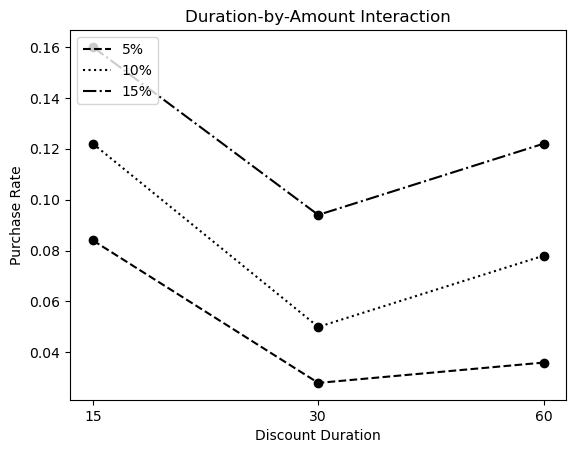

In [59]:
plt.figure()
plt.scatter(x = [1,2,3,1,2,3,1,2,3], y = [y_a5_d15,y_a5_d30,y_a5_d60,y_a10_d15,y_a10_d30,y_a10_d60,y_a15_d15,y_a15_d30,y_a15_d60], c = "black")
plt.ylabel("Purchase Rate")
plt.xlabel("Discount Duration")
plt.title("Duration-by-Amount Interaction")
plt.xticks(ticks = [1,2,3], labels = ['15', "30", "60"])
a5, = plt.plot([1,2,3], [y_a5_d15,y_a5_d30,y_a5_d60], c = "black", linestyle = "dashed", label = "5%")
a10, = plt.plot([1,2,3], [y_a10_d15,y_a10_d30,y_a10_d60], c = "black", linestyle = "dotted", label = "10%")
a15, = plt.plot([1,2,3], [y_a15_d15,y_a15_d30,y_a15_d60], c = "black", linestyle = "dashdot", label = "15%")
plt.legend(handles = [a5, a10, a15], loc = "upper left")
plt.show()

From the above plots, I don't see lines crossing or steep changes for two interaction plots. I would say there's no/only a little interaction. I would say the Amount=15% and Duration=15 is the optimal one.

(e)	[5 points] Consider a regression model that includes both the factors’ main effects as well as their two-factor interaction. 

-  State the hypothesis that would be tested to determine whether the two-factor interaction effect is significant. Define any notation you introduce.

-  For this hypothesis, calculate the relevant test statistic. State the equation of the test statistic, the test statistic value, and the null distribution of the test statistic.

-  For this hypothesis, calculate the relevant p-value. State both the equation of the p-value and the calculated value.

- Based on the calculated p-value, state whether you REJECT or FAIL TO REJECT the null hypothesis at a 5% level of significance, and draw a conclusion about the significance of the two-factor interaction.


To test the interaction, the hypothesis we are testing here is:
$$
H_0: \beta_5 = \beta_6 = \beta_7 = \beta_8 = 0
$$
$$
H_a: \text{At least one of } \beta_5, \beta_6, \beta_7, \text{ or } \beta_8 \neq 0
$$

$$\beta_5, \beta_6,  \beta_7,  \beta_8  \text{ are the coefficients in linear function that two factors have interaction } $$
$$\beta_5 \text{ for amount=10\% duration=30 interaction}$$
$$\beta_6 \text{ for amount=10\% duration=60 interaction}$$
$$\beta_7 \text{ for amount=15\% duration=30 interaction}$$
$$\beta_8 \text{ for amount=15\% duration=60 interaction}$$

In [7]:
main = smf.logit('Purchase ~ C(Amount) + C(Duration)', data = df).fit()
full = smf.logit('Purchase ~ C(Amount) * C(Duration)', data = df).fit()
full.summary()

Optimization terminated successfully.
         Current function value: 0.282344
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.281854
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Purchase   No. Observations:                 4500
Model:                          Logit   Df Residuals:                     4491
Method:                           MLE   Df Model:                            8
Date:                Thu, 18 Jan 2024   Pseudo R-squ.:                 0.03864
Time:                        14:25:56   Log-Likelihood:                -1268.3
converged:                       True   LL-Null:                       -1319.3
Covariance Type:            nonrobust   LLR p-value:                 1.688e-18
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -1.9736      0.137    -14.444      0.000      -2.241      -1.706
C(Amount)[T.15%]                       0.3154      0.183      1.722      0.085      -0.044       0.674
C(Amount)[T.5%]                       -0.4156      0.211     -1.966      0.049      -0.830      -0.001
C(Duration)[T.30]                     -0.9708      0.247     -3.938      0.000      -1.454      -0.488
C(Duration)[T.60]                     -0.4962      0.216     -2.302      0.021      -0.919      -0.074
C(Amount)[T.15%]:C(Duration)[T.30]     0.3633      0.315      1.154      0.249      -0.254       0.980
C(Amount)[T.5%]:C(Duration)[T.30]     -0.1871      0.400     -0.467      0.640      -0.972       0.597
C(Amount)[T.15%]:C(Duration)[T.60]     0.1808      0.283      0.639      0.523      -0.374       0.735
C(Amount)[T.5%]:C(Duration)[T.60]     -0.4022      0.361     -1.115      0.265      -1.109       0.305
======================================================================================================
"""

Null distribution: $$T \sim \chi^2_4$$


t-statistic = 2 * (likelihood_FullModel - likelihood_ReducedModel)

            = 2 * (-1268.344178860464 - (-1270.5500697730085)) = 4.411781825089292


p-value = P(T>=4.411781825089292)

In [55]:
t = 2 * (full.llf - main.llf)
pv = stats.chi2.sf(t, df = 4)
print("t = ", t)
print("p-value = ", pv)

t =  4.411781825089292
p-value =  0.35313640333696505


The p-value is 0.35313640333696505. With a significance level of 5%, this doesn't provide sufficient evidence to reject the null hypothesis and thus fail to reject null hypothesis.

There is no significant evidence that the interaction between Discount Amount and Duration has a noticeable impact on the response variable. 

(f)	[5 points] Construct main effect plots for each of the design factors identified in (b). Briefly describe the manner in which each factor influences the response, and identify the factor that appears to have the strongest influence.

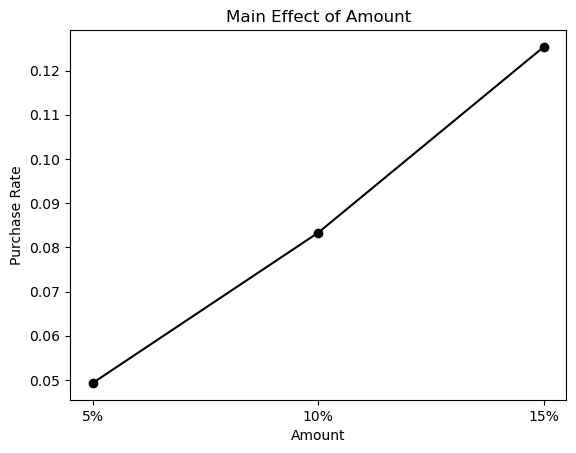

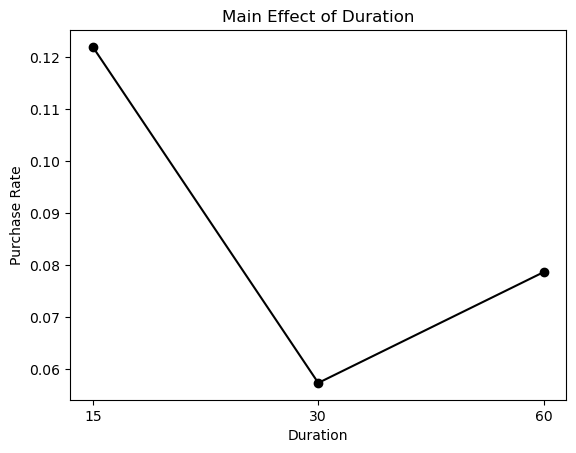

In [60]:
a_5 = df.groupby(['Amount']).get_group('5%')['Purchase'].mean()
a_10 = df.groupby(['Amount']).get_group('10%')['Purchase'].mean()
a_15 = df.groupby(['Amount']).get_group('15%')['Purchase'].mean()
plt.figure()
plt.scatter(x = [1,2,3], y = [a_5, a_10, a_15], c = "black")

plt.ylabel("Purchase Rate")
plt.xlabel("Amount")
plt.title("Main Effect of Amount")
plt.xticks(ticks = [1,2,3], labels = ['5%', "10%", "15%"])
plt.plot([1,2,3], [a_5, a_10, a_15], c = "black")
plt.show()

d_15 = df.groupby(['Duration']).get_group(15)['Purchase'].mean()
d_30 = df.groupby(['Duration']).get_group(30)['Purchase'].mean()
d_60 = df.groupby(['Duration']).get_group(60)['Purchase'].mean()
plt.figure()
plt.scatter(x = [1,2,3], y = [d_15, d_30, d_60], c = "black")

plt.ylabel("Purchase Rate")
plt.xlabel("Duration")
plt.title("Main Effect of Duration")
plt.xticks(ticks = [1,2,3], labels = ['15', "30", "60"])
plt.plot([1,2,3], [d_15, d_30, d_60], c = "black")
plt.show()


When discount amount increases, the browser-to-purchaser (BTP) conversion rate will increase as well.

When discount duration increases from 15 to 30, the BTP rate will drop, but when discount duration increases from 30 to 60, the BTP rate will increase.

I would say discount amount has the strongest influence.

(g)	[10 points] Consider a regression model that includes only the factors’ main effects. 

* For each factor, state the hypothesis that would be tested to determine whether the main effect of that factor is significant. Define any notation you introduce.
* For each of these hypotheses, calculate the relevant test statistic. State the equations of the test statistics, the test statistics' values, and their corresponding null distributions.
* For each of the hypotheses, calculate the relevant p-value. State both the equation of the p-value and the calculated value.
* Based on the calculated p-values, state whether you REJECT or FAIL TO REJECT the corresponding null hypotheses at a 5% level of significance, and draw a conclusion about which factor(s) have significant main effects.
    

For Amount:
$$H_0:\beta_1 = \beta_2 =0$$
$$H_a: \text{At least one of } \beta_1 \text{ or } \beta_2 \neq 0$$

$$\beta_1, \beta_2 \text{ are the coefficients in linear function that for Amount} $$
$$\beta_1 \text{ for amount=10\% }$$
$$\beta_2 \text{ for amount=15\% }$$

Null distribution: $$T \sim \chi^2_2$$


t-statistic = 2 * (likelihood_FullModel - likelihood_ReducedModel)

            = 2 * (-1268.344178860464 - (-1298.9368967054443)) = 56.77365386487145


p-value = P(T>=56.77365386487145)

In [64]:
main = smf.logit('Purchase ~ C(Amount) + C(Duration)', data = df).fit()
red_d = smf.logit('Purchase ~ C(Duration)', data = df).fit()
t = 2 * (main.llf - red_d.llf)
pv = stats.chi2.sf(t, df = 2)
print("t = ", t)
print("p-value = ", pv)

Optimization terminated successfully.
         Current function value: 0.282344
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.288653
         Iterations 7
t =  56.77365386487145
p-value =  4.696320249760636e-13


The p-value is 4.696320249760636e-13. With a significance level of 5%, this  provide sufficient evidence to reject the null hypothesis and thus we reject null hypothesis.

There is significant evidence that the discount amount has significant main effects

For duration:
$$H_0:\beta_3 = \beta_4 =0$$
$$H_a: \text{At least one of } \beta_3 \text{ or } \beta_4 \neq 0$$

$$\beta_3, \beta_4 \text{ are the coefficients in linear function that for duration} $$
$$\beta_3 \text{ for duration=15 }$$
$$\beta_4 \text{ for duration=30 }$$

Null distribution: $$T \sim \chi^2_2$$


t-statistic = 2 * (likelihood_FullModel - likelihood_ReducedModel)

            = 2 * (-1268.344178860464 - (-1291.2027889674453)) = 41.30543838887343


p-value = P(T>=41.30543838887343)

In [66]:
red_a = smf.logit('Purchase ~ C(Amount)', data = df).fit()
t = 2 * (main.llf - red_a.llf)
pv = stats.chi2.sf(t, df = 2)
print("t = ", t)
print("p-value = ", pv)

Optimization terminated successfully.
         Current function value: 0.286934
         Iterations 7
t =  41.30543838887343
p-value =  1.0730946200896845e-09


The p-value is 1.0730946200896845e-09. With a significance level of 5%, this  provide sufficient evidence to reject the null hypothesis and thus we reject null hypothesis.

There is significant evidence that the discount duration has significant main effects

Both amount and duration have significant main effects on BTP conversion rate

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

#### QUESTION 2 [13 points]

[Lyft](https://www.lyft.com/) is a San Francisco-based ride-sharing app available in 644 cities in the US and 12 cities in Canada. In recent years, Lyft has branched out beyond the traditional ride-sharing business model, and now offers grocery deliveries, rental cars, and a network of [eBikes](https://www.lyft.com/bikes) and [eScooters](https://www.lyft.com/scooters). In fact, Lyft's TBS (Transit, Bikes, and Scooters) team operates the largest bike-sharing network in North America and, [as discussed in this article](https://eng.lyft.com/a-b-tests-for-lyft-hardware-570330b488d4), highly values designed experiments as a means of ensuring reliable hardware. 

When a potential rider encounters a problem with a particular bike, they click a small flag icon in the Lyft app to flag a problem. This might be a problem with the battery, the tires, the brakes, the motor, the chain, the software, etc. Ideally, such problem flags would occur infrequently, and the number of times a bike is ridden before a problem is flagged would be large; highly reliable bikes should run properly for many rides. The TBS team is interested in identifying what factors significantly influence the *number of rides before a flag* (RBF). Four such factors have been identified, and the team intends to perform a two-level factor screening experiment to investigate them. The factors and their *high* and *low* levels are described in the table below.


Suppose that running a full $2^4$ factorial experiment is feasible. In this experiment 16 bike configurations are developed in accordance with the $2^4$ different combinations of the levels of factors $A,B,C,D$. Then, $n=100$ bikes are set up in each of the 16 configurations. Each of these bikes is then monitored prospectively until a problem is flagged, and each bike's RBF number is recorded. These data can be found in the `lyft.csv` file.

(a) [3 points] What are the metric of interest, the response variable, and the experimental units in this experiment?

    MOI: average number of rides before a flag (RBF)

    Response variable : number of rides before a flag (RBF) of each condition

    Experimental units : bikes


(b) [4 points] Fit a full linear regression model and identify the *active* factors (i.e., the ones whose main effects are significantly different from 0, at the 1% significance level). For each active factor, calculate and state the *main effect* of that factor.


In [68]:
df_lyft = pd.read_csv('./data/lyft.csv')
df_lyft

,A,B,C,D,RBF
0,-1,-1,-1,-1,1130
1,-1,-1,-1,-1,968
2,-1,-1,-1,-1,983
3,-1,-1,-1,-1,1142
4,-1,-1,-1,-1,1049
...,...,...,...,...,...
1595,1,1,1,1,2426
1596,1,1,1,1,1977
1597,1,1,1,1,2243
1598,1,1,1,1,2296


In [69]:
model = smf.ols('RBF ~ A * B * C * D', data = df_lyft).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RBF   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     6178.
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:06:37   Log-Likelihood:                -9620.4
No. Observations:                1600   AIC:                         1.927e+04
Df Residuals:                    1584   BIC:                         1.936e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1504.5475      2.484    605.657      0.000    1499.675    1509.420
A             -2.0038      2.484     -0.807      0.420      -6.876       2.869
B            296.3350      2.484    119.290      0.000     291.462     301.208
A:B            1.4262      2.484      0.574      0.566      -3.446       6.299
C           -297.2637      2.484   -119.664      0.000    -302.136    -292.391
A:C           -1.3725      2.484     -0.553      0.581      -6.245       3.500
B:C            0.1387      2.484      0.056      0.955      -4.734       5.011
A:B:C         -0.7425      2.484     -0.299      0.765      -5.615       4.130
D            597.3500      2.484    240.464      0.000     592.477     602.223
A:D           -2.3138      2.484     -0.931      0.352      -7.186       2.559
B:D            0.3225      2.484      0.130      0.897      -4.550       5.195
A:B:D          3.1813      2.484      1.281      0.201      -1.691       8.054
C:D          197.1262      2.484     79.353      0.000     192.254     201.999
A:C:D          4.6150      2.484      1.858      0.063      -0.258       9.488
B:C:D          0.4288      2.484      0.173      0.863      -4.444       5.301
A:B:C:D        1.6550      2.484      0.666      0.505      -3.218       6.528
==============================================================================
Omnibus:                        1.726   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.422   Jarque-Bera (JB):                1.627
Skew:                          -0.055   Prob(JB):                        0.443
Kurtosis:                       3.110   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With the significant level of 1%, the factors of B, C and D are the active factors. (Their p-value smaller than 0.01)

Effect_hat = 2 * beta

- Effect_b = 2 * 296.3350 = 592.67
  
  When keeping all the factors the same, 
  when the Sleep Mode (B) changes from Off to On, the expected RBF will increase by 592.67

- Effect_c = 2 * -297.2637 = -594.5274

  When keeping all the factors the same, 
  when the changes from Low Power Motor to High Power Motor, the expected RBF will decrease by 594.5274

- Effect_d = 2 * 597.3500 = 1194.7
  
  When keeping all the factors the same, 
  when the changes from Monthly Maintenance Routine to Bi-Weekly, the expected RBF will increase by 1194.7.


(c) [6 points] Use the model from part ii. to identify the *active* two-factor interactions (i.e., the ones whose coefficients are significantly different from 0, at the 1\% significance level). For each active factor and each significant two-factor interaction, construct main effect and interaction effect plots. Comment on what you observe.


With the significant level of 1%, the factor C:D is two-factor interactions. (p-value = 0.000 smaller than 0.01)

Text(0.5, 0, 'Sleep Mode (B)')

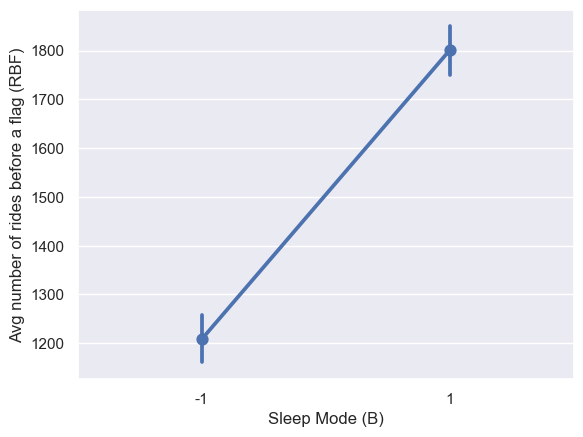

In [87]:
# Main effect of Sleep Mode (B)
sns.set_theme(style="darkgrid")
fig1 = sns.pointplot(x="B", y="RBF", data=df_lyft)
fig1.set_ylabel("Avg number of rides before a flag (RBF)")
fig1.set_xlabel("Sleep Mode (B)")
# fig1.set_ylim(0.01, 0.04)

When the sleep mode is on, the average number of rides before a flag (RBF) is higher than those with sleep mode off.

Text(0.5, 0, 'eAssist (C)')

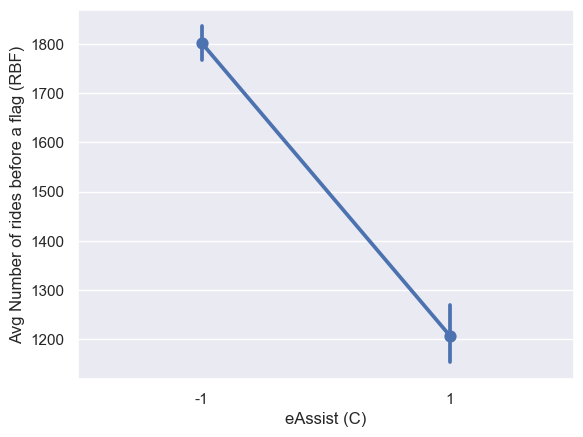

In [88]:
# Main effect of eAssist (C)
sns.set_theme(style="darkgrid")
fig1 = sns.pointplot(x="C", y="RBF", data=df_lyft)
fig1.set_ylabel("Avg Number of rides before a flag (RBF)")
fig1.set_xlabel("eAssist (C)")

When the e-assist that high power motor provided for bikes, the average number of rides before a flag (RBF) is lower than those with low power motor.

Text(0.5, 0, 'Routine Maintenance (D)')

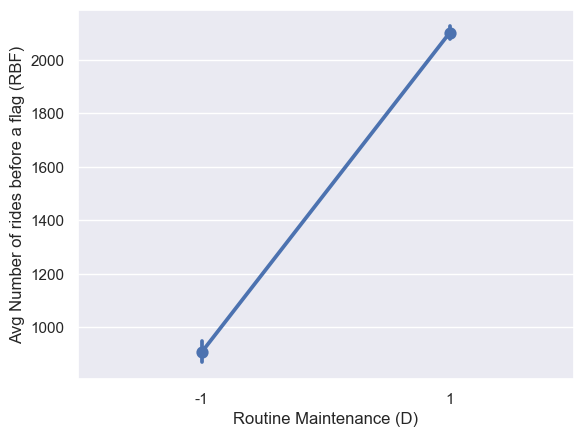

In [89]:
# Main effect of Routine Maintenance (D)
sns.set_theme(style="darkgrid")
fig1 = sns.pointplot(x="D", y="RBF", data=df_lyft)
fig1.set_ylabel("Avg Number of rides before a flag (RBF)")
fig1.set_xlabel("Routine Maintenance (D)")

When the maintenance routine is bi-weekly, the average number of rides before a flag (RBF) is higher than those with monthly maintenance routine.

Text(0.5, 0, 'eAssist (C)')

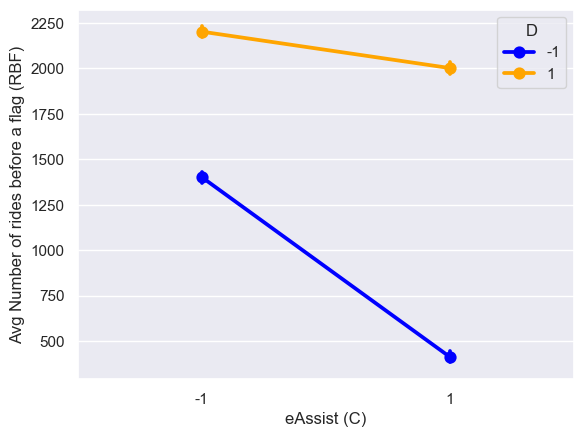

In [90]:
# Interaction between C and D
sns.set_theme(style="darkgrid")
custom_palette = {1: "orange", -1: "blue"}
figcd = sns.pointplot(x="C", hue="D", y="RBF", data=df_lyft, palette=custom_palette)
figcd.set_ylabel("Avg Number of rides before a flag (RBF)")
figcd.set_xlabel("eAssist (C)")

The interaction for eAssist and Routine Maintenance exists.

With bi-weekly maintenance routine, the average RBF will drop with the e-assist that high power motor provide, comparing to those with low power motor.

However, with monthly maintenance routine, the average RBF will drop more steeply with the e-assist that high power motor provide, comparing to those with low power motor.